# Desafío entregable- Insights a partir de visualizaciones
## Curso Data Science - CODERHOUSE

____________________________________________________
____________________________________________________
### Estudiante: Marvin Cruz Sandoval DNI: 95711072
### Profesora: Estefanía Susanj
### Tutor: Giuliano Crena

________________________
_______________________

*Objetivos de la entrega:* 

- Agregar abstracto con motivación y audiencia.
- Cargar proyecto en GITHUB
- Obtener insights a partir de visualizaciones
- Generar presentación ejecutiva.


## Abstract

---

El desarrollo energético de LATAM y el CARIBE ha estado fuertemente relacionado a las tendencias mundiales pero también a situaciones pariculares de cada país.

Dentro del ámbito energético es importante conocer las tendencias y contar con estimaciones y proyecciones de ciertos parámetros a la hora de la toma de decisiones estratégicas. 

El presente proyecto tendrá como finalidad, en primera instancia, realizar un análisis descriptivo de la información disponible. 

Posteriormente se realizará una limpeza y adecuación de los datos para un correcto análisis. Se verifica la presencia de valores nulos y atípicos para verificar si existen registros que no deberán ser considerados en el análisis. 

Luego de la realización de la adecuación del dataset, se realizan una serie de gráficas utilizando la librería Seaborn y con el apoyo de análisis numéricos, se realzan las observaciones y verificación de las hipótesis y preguntas planteadas al principio del análisis. 

El presente proyecto se justifica dada la importancia crítica que tiene el adecuado suministro de energía eléctrica como motor del desarrollo local, regional y mundial. Con el paso de los años las empresas de energia (públicas y privadas) han ido migrando hacia un paradigma de gestión *data driven*, impulsado primordialmente por la digitalización y la aparición de controles regulatorios producto de la privatización de este servicio en muchos paises, con lo que también se pone en escena la operación de organismos de fiscalización y control. De igual forma las diferentes preocupaciones a nivel internacional relacionadas con la seguridad del suministro eléctrico, así como mantener como objetivo una mejora en los indicadores de eficiencia y reducción de emanaciones de efecto invernadero hacen que el presente análisis sea de interés para diferentes perfiles interesados en obtener respuesta a diferentes cuestiones relacionadas.  

El dataset seleccionado contine información sobre los indicadores de acceso a energía eléctrica de los paises de América Latina y el caribe, basado en información proporcionada por diferentes empresas y organismos gubernamentales.

Toda la información ha sido compilada por el Banco Mundial, descargada del sitio: https://energydata.info/

### Motivación

El mercado energético es uno de los de mayor importancia  nivel mundial, las empresas de la región se enfrentan a diferentes retos y necesidades.

Por ejemplo, una empresa con mucha longitud de líneas de distribución y alta cantidad de reclamos podría estar interesada en servicios de consultoría para mejorar sus indicadores, por otro lado, una empresa con niveles altos de transporte de energía e indicadores altos de hurto de energía y y conexiones irregulares, debería invertir en su gestión de pérdidas de energía. 

La propuesta es generar una clasificación de empresas para poner a disposición del comité técnico-comercial de una empresa de servicios de consultoría y provisión de equipos, de esta forma será posible orientar de mejor forma las estrategias de venta conociendo previamente las necesidades propias de cada clente potencial. 

De esta forma se minimizarán los tiempos invertidos en clientes que por sus inidicadores es muy probable que no estén interesados en todas las soluciones de consultoría y productos ofrecidos. 


### Audiencia

La audiencia para este proyecto es personal del sector técnico-comercial de una empresa de servicios de consultoría y provisión de equipos de baja, media y alta tensión para empresas de distribución eléctrica. 

### Objetivo

Generar clasificación de empresas para orientar adecuadamente las estrategias comerciales de una empresa de soluciones técnicas y consultoría del sector energía. 

### Contexto comercial

El proyecto se encuadra en la necesidad de una empresa hipotetica que pretende ingresar con equipos para el rubro distribución eléctrica en el mercado LATAM y CARIBE. 

La compañía requiere definir sus estrategias de ventas, por lo que ha solicitado la realización del estudio con datos estadísticos obtenidos en la base de datos público proporcionados por del Banco Mundial. Con el análisis de datos y los insights presentados, la gerencia de planificación comercial definirá y orientará las políticas comerciales en la región. 


### Problema comercial 

Dificultad para orientar adecuadamente las estrategias comerciales según la empresa o país. 

Pérdida de tiempo productivo por el ofrecimiento de productos de manera general, cuando las empresas orientarán sus gastos e inversiones en función de sus requerimietos específicos. 

### Contexto analítico

Se tiene un data set con información histórica de empresas de la región LATAM y Caribe, información compilada y brindad por el Banco Mundial sin cargo. 

Se prevé que con esta información se tiene información suficiente para la deteminación de las recomendacione solicitadas. 



## Preguntas e hipótesis planteadas

---

### Hipótesis:

* La información disponible será menor a medida que los registros sean más antiguos. 

* A medida que los registros correspondan a periodos más actuales, se tendrá mayor disponibilidad de información.

* La distribución de pérdidas de energía es homogénea en todos los países de la región. 


### Preguntas formuladas:

* Los registros de pérdidas de energía muestran un incremento en la eficiencia de los sistemas a través del tiempo?

* Con la información disponible es posible proyectar los crecimientos de demanda por país? 

* Cual es la correlación que se tiene entre las distintas variables manejadas?

###  Importación de librerías a utilizar



In [2]:
#Importamos las librerias a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
#Configuramos para que no muestre los warnings y obtener una visualización más limpia

import warnings
warnings.filterwarnings('ignore')


### Carga de Dataset

De los 3 Datasets presentados inicialmente, se decide continuar con el Dataset denominado _Datos de acceso a electricidad Latinoamérica y el Caribe_

Este Dataset contine información sobre los indicadores de acceso a energía eléctrica de los paises de América Latina y el caribe, basado en información proporcionada por diferentes empresas y organismos gubernamentales. 

Fuente de datos: https://energydata.info/


In [4]:
#Carga de archivo .csv a utilizar

df= pd.read_csv("2.Latam data energy access_world_bank.csv", sep=";")



#Muestra de encabezado de Data Frame
df.head(5)


,_id,country,utility name,utility code,utility ID,year,Type of connection,1,2,3,...,16,17,18,19,20,21,22,23,24,25
0,1,country,utility name,utility code,utility ID,year,Type of connection,Total number of connections (residential and ...,Total Number of residential connections in the...,Total electricity sold per year (MWh),...,Number of residential subscribers per 100 hous...,Number of customer complaints per year,Average duration between customer complaint an...,Average residential tariff (local nominal curr...,Average industrial tariff (local nominal curre...,Installation Cost (residential) local nominal ...,Installation Cost (Industrial) local nominal c...,Year of privatization,Residencial conexions per employee,Energy sold per employee
1,2,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
2,3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,4.293.683.333,3.694.916.667,118861.9,...,NaN,NaN,NaN,4.985.647.636,1.735.030.265,NaN,NaN,0,NaN,NaN
4,5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,4.612.191.667,40018.5,124118.5,...,NaN,NaN,NaN,7.285.148.198,1.816.219.628,NaN,NaN,0,NaN,NaN


In [5]:
# Obtenemos las dimensiones del Dataset
df.shape

(4075, 32)

In [6]:
#Obtenemos la info de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 4075 non-null   int64 
 1   country             4075 non-null   object
 2   utility name        4075 non-null   object
 3   utility code        4061 non-null   object
 4   utility ID          4052 non-null   object
 5   year                4061 non-null   object
 6   Type of connection  4061 non-null   object
 7   1                   2899 non-null   object
 8   2                   2916 non-null   object
 9   3                   3190 non-null   object
 10  4                   1438 non-null   object
 11  5                   2550 non-null   object
 12  6                   818 non-null    object
 13  7                   497 non-null    object
 14  8                   1284 non-null   object
 15  9                   1143 non-null   object
 16  10                  1283

Al obtener las dimensiones mediante el método "shape" se logra determinar que el Data Frame posee 4075 filas y 32 columnas, por otra parte, las columnas contienen datos de tipo objeto. 

______________________________________________________________________________________________________________________

#### Observación importante: Se verifica que los datos del index se encuentran en la 3a fila del data set (del csv cargado), mientras que la fila 1 contiene un correlativo de las columnas y la fila 2 posee información explicativa del contenido de cada columna. 
  
#### Se genera un array para almacenar la información explicativa del contedido de cada celda y se define la información de la fila No. 3 como encabezados de columna.

###  EDA

Se desea saber la cantidad de valores NAN que se están manejando en el Dataset

In [7]:
# analizando valores NAN
df_nan=df.isna().sum()
df_nan

_id                      0
country                  0
utility name             0
utility code            14
utility ID              23
year                    14
Type of connection      14
1                     1176
2                     1159
3                      885
4                     2637
5                     1525
6                     3257
7                     3578
8                     2791
9                     2932
10                    2792
11                    1575
12                    3521
13                    3525
14                    2699
15                    2793
16                    2446
17                    3525
18                    3739
19                    1910
20                    2711
21                    3662
22                    3922
23                     383
24                    1916
25                    1725
dtype: int64

* Se observa un alto porcentaje de valores NAN en muchos campos.

* Se asume que los valores NAN deberían corresponder a los periodos mas antiguos posiblemente por falta de registro de los parámetros 

* En este caso no se considera recomendable realizar imputación de los datos faltantes, dado que se podrían generar errores de interpretación. 

### Analisis de datos nulos con librería Missingno

<Axes: >

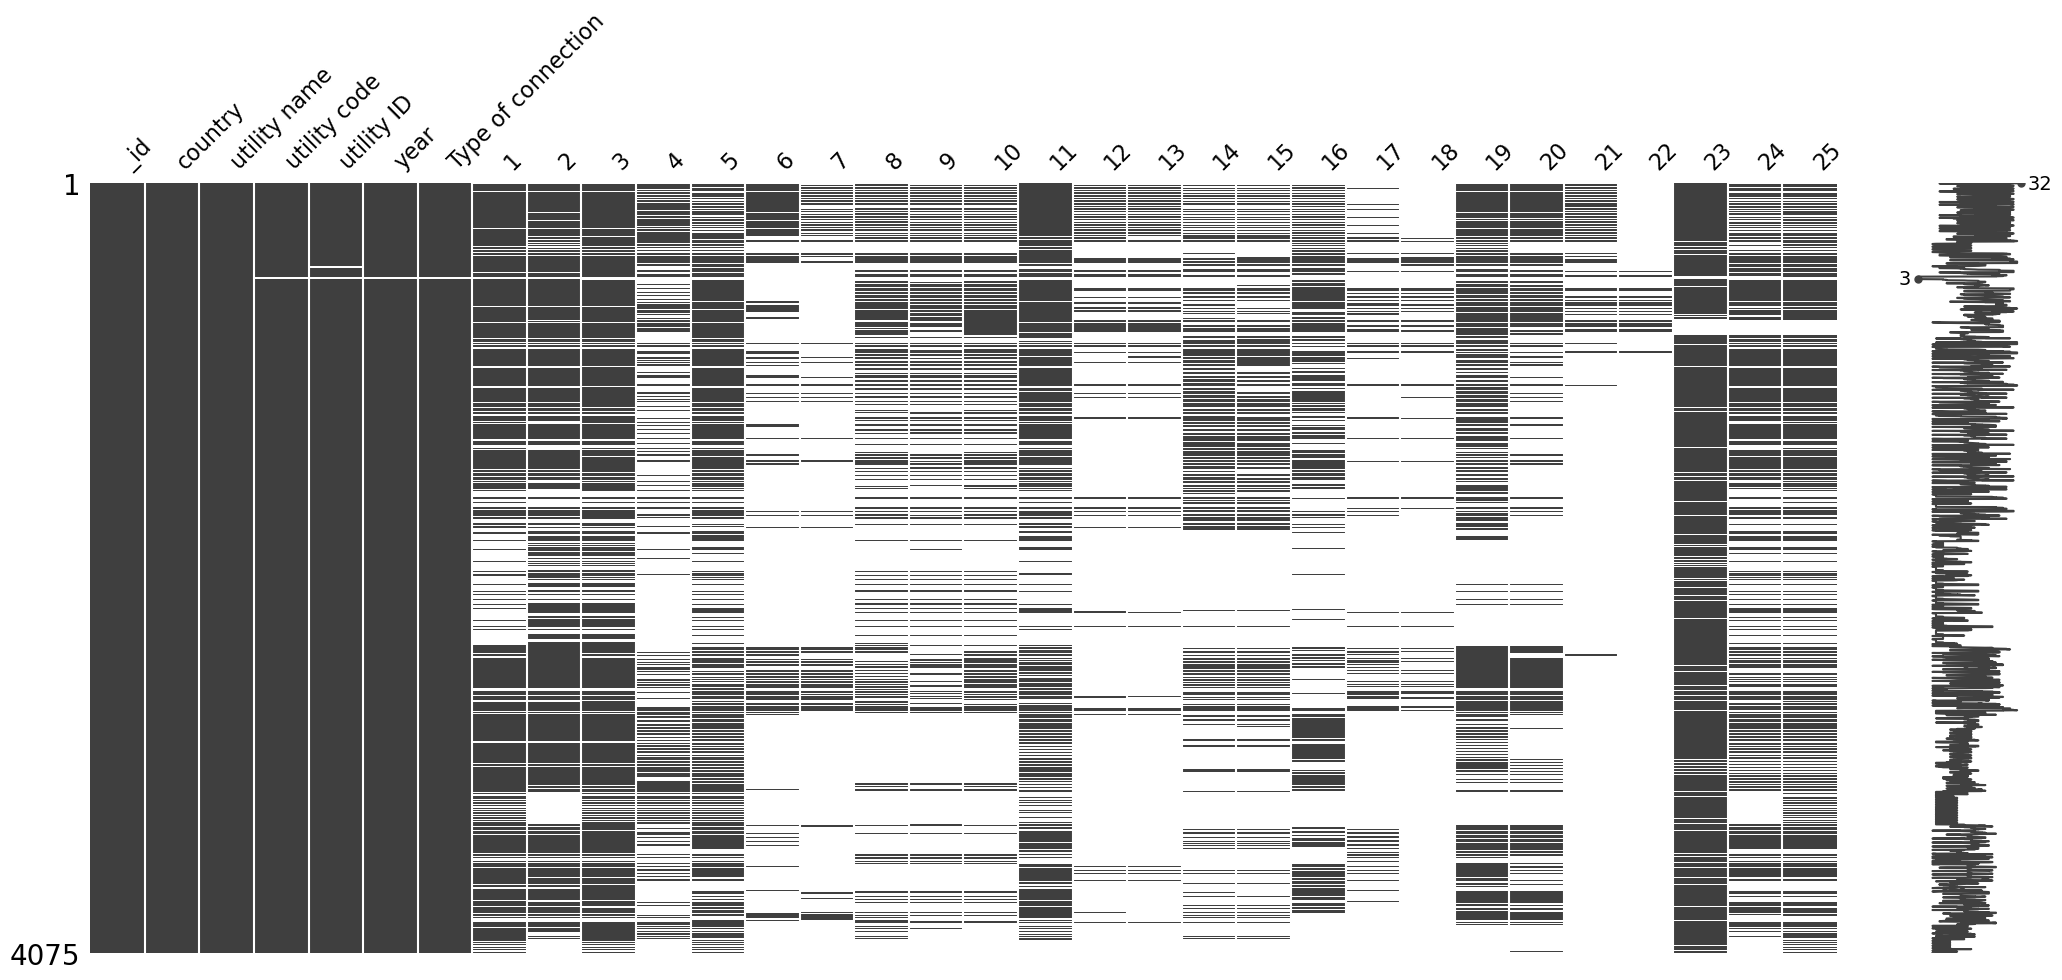

In [8]:
#Importamos la librería
msno.matrix(df)

<Axes: >

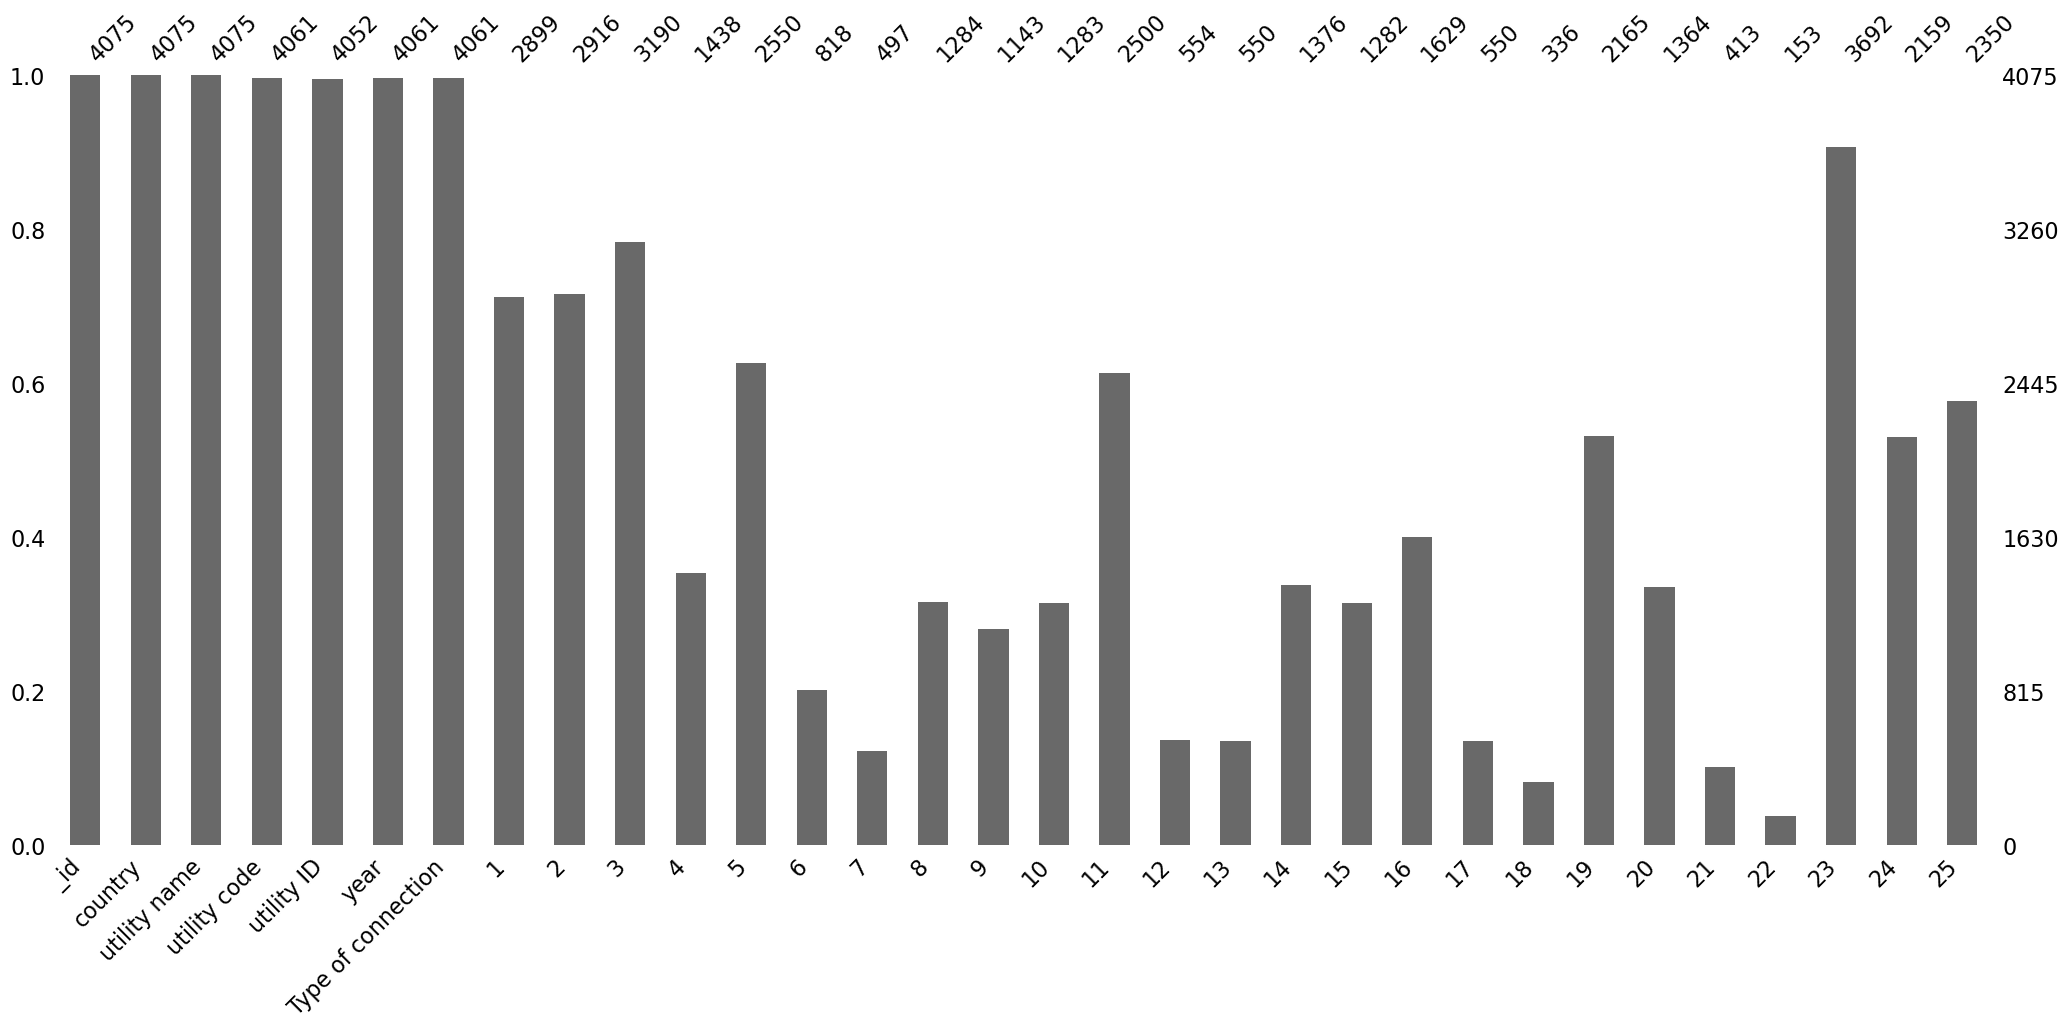

In [9]:
msno.bar(df)

## Data Wrangling

A continuación se crea un array para guardar las descripción de los campos para futura referencia. 

In [10]:

df_desc = df.iloc[0].to_numpy()

#Eliminando la 1a columna que es redundante
df_desc = np.delete(df_desc, 0)

for a in df_desc:
    #print(f"Columna {df_desc.index[a]} : {a}")
    i = list(df_desc).index(a)
    print(f"Descripción de Columna {i}: {a}")

Descripción de Columna 0: country
Descripción de Columna 1: utility name
Descripción de Columna 2: utility code
Descripción de Columna 3: utility ID
Descripción de Columna 4: year
Descripción de Columna 5: Type of connection
Descripción de Columna 6:  Total number of connections (residential and non-residential) in the utility area
Descripción de Columna 7: Total Number of residential connections in the utility area
Descripción de Columna 8: Total electricity sold per year (MWh)
Descripción de Columna 9: Length of distribution network (km) 
Descripción de Columna 10: Total number of employees 
Descripción de Columna 11: Average wholesale price paid per MWh (local nominal currency)
Descripción de Columna 12: Average transmission charges per MWh purchased (local nominal currency)
Descripción de Columna 13: OPEX (operation expenditures) of the distribution services (local nominal currency)
Descripción de Columna 14: CAPEX (captial expenditures) of the distribution services (local nominal 

Luego se eliminan las primeras dos filas y se asigna la tercera como "index" para que el Data Frame sea cargado de manera correcta:

In [11]:
df.columns = df.iloc[1]
df=df.drop([0,1])
df= df.drop(columns=[2])

# Se muestra el data set listo para el proceso de análisis
df.head()

1,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,length_net,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
2,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,4.293.683.333,3.694.916.667,118861.9,NaN,...,NaN,NaN,NaN,4.985.647.636,1.735.030.265,NaN,NaN,0,NaN,NaN
4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,4.612.191.667,40018.5,124118.5,NaN,...,NaN,NaN,NaN,7.285.148.198,1.816.219.628,NaN,NaN,0,NaN,NaN
5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1997,Elec - Distribution,5.046.158.333,4.385.358.333,134097.2,NaN,...,NaN,NaN,NaN,2.891.591.355,277.406.999,NaN,NaN,0,NaN,NaN
6,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1998,Elec - Distribution,5.229.333.333,4.585.483.333,146304.8,NaN,...,NaN,NaN,NaN,2.985.768.958,295.955.862,NaN,NaN,0,NaN,NaN


In [12]:
#Se observó que hay dos tipos de nombre que hace referncia al pais Perú, nombres "Per" y "Peru"
df["country"].unique()

array(['Ecuador', 'Costa Rica', 'Mexico', 'Uruguay', 'Peru', 'Per',
       'Brazil', 'Chile', 'Colombia', 'Paraguay', 'Haiti', 'Argentina',
       'Belize ', 'Bolivia', 'Antigua and Barbuda ', 'Dominica',
       'Grenada', 'St Kitts and Nevis', 'St Lucia',
       'St Vincent and the Grenadines ', 'El Salvador', 'Guatemala',
       'Honduras', 'Nicaragua', 'Jamaica', 'Panama',
       'Republica Dominicana', 'Venezuela'], dtype=object)

In [13]:
# Se realizan los reemplazos por los codigos de pais ISO paraluego poder graficar y comparar con información de otros Data Sets.

reemplazos = {'Ecuador':'ECU', 'Costa Rica':'CRI', 'Mexico':'MEX', 'Uruguay':'URY', 'Peru':'PER', 'Per':'PER',
       'Brazil':'BRA', 'Chile':'CHL', 'Colombia':'COL', 'Paraguay':'PRY', 'Haiti':'HTI', 'Argentina':'ARG',
       'Belize ':'BLZ', 'Bolivia':'BOL', 'Antigua and Barbuda ':'ATG', 'Dominica':'DMA',
       'Grenada':'GRD', 'St Kitts and Nevis':'SKN', 'St Lucia':'LCA',
       'St Vincent and the Grenadines ':'VCT', 'El Salvador':'SLV', 'Guatemala':'GTM',
       'Honduras':'HND', 'Nicaragua':'NIC', 'Jamaica':'JAM', 'Panama':'PAN',
       'Republica Dominicana':'DOM', 'Venezuela':'VEN'}
    
df.replace({'country': reemplazos}, inplace=True)   
    

  ## Uso de la librería Dataprep

Se realiza análisis de los datos aprovechando la librería DataPrep. 

In [14]:
# Transformando los datos de perdidas porcentuales en valores numericos para procesamiento y graficación
# Se genera una lista con los nombres de los campos no categóricos para de esa forma realizar la transformación de los datos. 

num_columns=['n_con','n_rd_con', 'mwh_sold', 'length_net', 'n_wrks', 'whosale_price_p','transm_chrs_p', 'opex', 'capex', 'totex', 'd_losses', 'd_losses_t','d_losses_c', 'dur_interr', 'freq_interr', 'coverage', 'complains','dur_problem', 'avg_rd_tariff_p', 'avg_in_tariff_p', 'inst_rd_price_p','inst_in_price_p', 'd_priv', 'rd_cn_wkr', 'mwh_wkr']

for i in df.columns:
    if i in num_columns:
        df[i]= pd.to_numeric(df[i], errors='coerce')
        

In [15]:
from dataprep.eda import create_report
create_report(df).show_browser()

  0%|          | 0/5992 [00:00<?, ?it/s]

### Algunos comentarios sobre lo observado. 

Existe una fuerta correlación entre algunas variables: 

* Numero de reclamos ("complains") con las variables "n_con", "mwh_sold", y otras que están relacionadas directamente con el tamaño de la empresa distribuidora.

* Cargos de transmisión ("transm_chrs_p") con cantidad de kmd e red ("lenght_net").

* TOTEX (Gastos en red de distribución) y precio de instalación residencial ("inst_rd_price_p")

* En el otro extremo, la variables con menos correlación son: 

* Precio de instalación residencial e industrial vs valores de energía por empleado. 

* Precio de venta vs precio de instalación. 

## Análisis de evolución de disponibilidad de información 

Se aprecia de manera gráfica que la cantidad de valores NAN es elevada para el dataset elegido. 

Como primera impresión se podría tender a pensar que el dataset no es adecuado para el análisis, no obstante dentro del comportamiento observado surge la interrogante de si la situación de los valores NAN tiene relación con l aantiguedad de los registros (En las decadas pasadas la información en general no estaba disponible, además presumiblemente no se gestionaban indicadores) 

Para verificar lo anterior se crea la siguiente grafica donde se totalizan los registros válidos disponibles (para todos los campos de datos) en función del año: 

In [16]:

#Obtenemos un Dataframe con el conteo de regitros agrupados por año

df_nancount=df.groupby('year').count()
df_nancount.head()


1,country,name,code,id_conce,typ_conc,n_con,n_rd_con,mwh_sold,length_net,n_wrks,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
year,,,,,,,,,,,,,,,,,,,,,
1973,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1974,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1975,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1976,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1977,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Se seleccionan 3 parámetros para evaluar la cantidad de datos que se fueron obteniendo en el tiempo

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

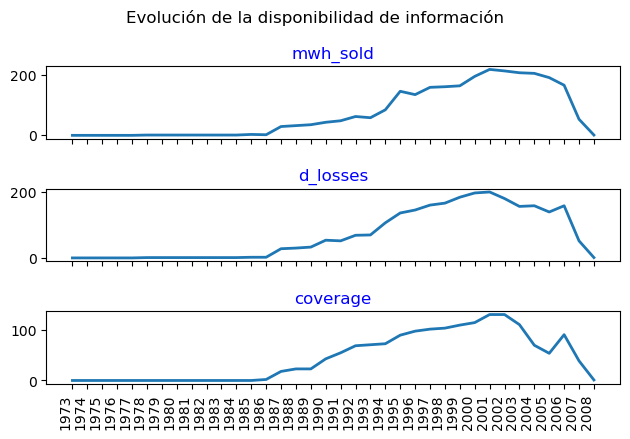

In [17]:
# Grafico de linea de 3 parámetros seleccionados para ver la evaluación de registros en el tiempo:

fig, ax = plt.subplots(3,1)


ax[0].plot(df_nancount.index, df_nancount['mwh_sold'], linewidth=2.0)

ax[1].plot(df_nancount.index, df_nancount['d_losses'], linewidth=2.0)

ax[2].plot(df_nancount.index, df_nancount['coverage'], linewidth=2.0)

#ax[1,1].plot(df_nancount.index, df_nancount['complains'], linewidth=2.0)


fig.suptitle("Evolución de la disponibilidad de información") # titulo general para mis graficos!
ax[0].set_title('mwh_sold', fontsize=12, color="blue") 
ax[1].set_title('d_losses', fontsize=12, color="blue") 
ax[2].set_title('coverage', fontsize=12, color="blue") 
#ax[1, 1].set_title('complains', fontsize=12, color="blue") 


#El sigiuente método es para mantener ajuste entre los subgráficos

fig.tight_layout()

#Rotamos el texto del gráfico

fig.autofmt_xdate(rotation=90)






Se observa que el tal como se presumía, la disponibilidad de información para los 2 parámetros elegidos comienza a ser relevante durante la década de 1980. El decrecimiento en los últimos períodos puede responder a la demora o  tiempo de "desclasificación" de la información por empresas y organismos de control. 

Tiene sentido pensar que en los últimos años la disponibilidad de la información se ha ido incrementando en todos los sectores, influenciado por el monitoreo de indicadores por parte de los organismos de control así como por la incursión de la gestión basada en sistemas de la información. 

Con el filtrado anterior se realizará la graficación de la evolución del % de perdidas totales en la res de distribución promediando por año y por país. Se decide utilizar un gráfico tipo línea. 

In [18]:
# Damos un vistazo al df resultante

df.head()

1,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,length_net,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
2,ECU,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,ECU,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,NaN,NaN,118861.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,ECU,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,NaN,40018.5,124118.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
5,ECU,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1997,Elec - Distribution,NaN,NaN,134097.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
6,ECU,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1998,Elec - Distribution,NaN,NaN,146304.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


### Análisis de parámetros

Se realiza un análisis de información enfocándonos en las pérdidas de energía. 
Este indicador nos brinda información importante sobre la eficiencia operacional del sistema. 

Esencialmente las pérdidas se clasifican en (COnsiderando la nomenclatura del data set en uso): 

__d_losses__     ====>   Pérdidas totales en distribución, medidas como % de la energía total circulante

__d_losses_t__   ====>   Pérdidas técnicas en distribución (Por operación), medidas como % de la energía total circulante

__d_losses_c__   ====>   Pérdidas totales en distribución (Hurtos, errores de medida), medidas como % de la energía total circulante

Se realiza una tabla con los valores de pérdidas, promediando por año para toda LATAM.

In [19]:
#Obteniendo el promedio de perdidas de energía por año para graficar :

df_loss=df[["year","country","d_losses","d_losses_t","d_losses_c"]].groupby('year').mean()

df_loss_c=df[["year","country","d_losses","d_losses_t","d_losses_c"]]

df_loss_c


1,year,country,d_losses,d_losses_t,d_losses_c
2,1994,ECU,0.246392,NaN,NaN
3,1995,ECU,0.248841,NaN,NaN
4,1996,ECU,0.246485,NaN,NaN
5,1997,ECU,0.256774,NaN,NaN
6,1998,ECU,0.246590,NaN,NaN
...,...,...,...,...,...
4070,2002,VEN,NaN,NaN,NaN
4071,2003,VEN,NaN,NaN,NaN
4072,2004,VEN,NaN,NaN,NaN
4073,2005,VEN,NaN,NaN,NaN


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


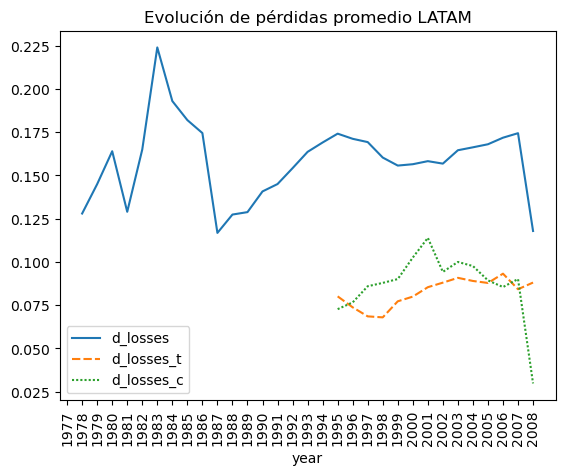

In [20]:
ax=sns.lineplot(data=df_loss)

ax.set_title("Evolución de pérdidas promedio LATAM")

ax.tick_params(axis='x', rotation=90)

ax.legend(loc='lower left')



Observaciones importantes:

* Se observan registros de pérdidas de energía a partir de 1978. 

* Durante la década de los 80´ se registra un incremento en el índice de pérdidas totales de energía en la región llegando a un pico de 22%

* En la década del 2000 los niveles promedio de pérdidas de energía en las redes se situan en el orden del 15%. 

* A partir del 2007 se ve una caida abrupta, relacionada con al poca disponibilidad de información, por lo que se determina que el anális es valido hasta 2007. 

* Se observa que la disgregación de pérdidas entre técnicas y comerciales comienza a ser relevante a partir de 1995. 

* Luego del inicio de los registros de pérdidas tecnicas se observa que el promedio es estable hasta la finalización del período de disponibilidad de datos. 


Para el presente apartado se buscará analizar valores de pérdidas totales por pais, mediante un boxplot con el que ademas se verificara si existen outlyers. 
Por otra parte se buscará determinar si existe relación entre las pérdidas de energia y el volumen de energía manejado.

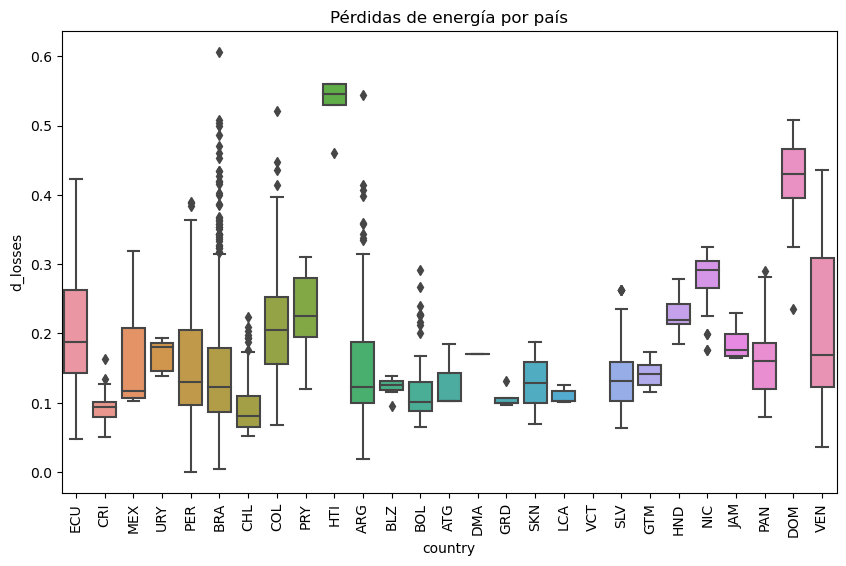

In [21]:
# Obteniendo la tabla para graficar

from matplotlib import rcParams
# Aumentamos el tamaño de la grafica para observar claramente la grafica. 
rcParams['figure.figsize'] = 10,6

#Creamos el boxplot.
boxplot=sns.boxplot(x="country",
                y="d_losses",
                data=df)

boxplot.set_title('Pérdidas de energía por país')

#Agregamos rotación a los ejes:
a=boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)



Se observa que Brasil posee la mayor cantidad de valores outlyers, seguido por Argentina y Bolivia. Para el caso de Haiti se considera que tiene la mayor cantidad de Perdidas de energía de la region, con un promedio, y valores caracteisticos del boxplot excepcionalmente altos comparados con el resto de paises. 

Por otra parte, vemos que San Vicente y las Granadinas no tiene información sobre este parámetro. 

Se observan varias situaciones de interés: 

* El agrupamiento de pérdida de energía es concentrado en valores de 0.10 a 0.20, independiente de las dos variables de los ejes. 

* Existen valores de pérdida de energía muy en rango, pero con valores de venta de energía y km de red muy elevados, igual comportamiento se aprecia sobre la cuarta variable (hue) Esto indica que las empresas eléctricas de mayor tamaño, así como los paises con mayor consumo mantienen una operación que se considera dentro del rango de pérdidas aceptable. 

* Se tiene una alta correlación entre la energía circulante y los knm totales de red. 

* La distribución de pérdidas mantiene valores en general distribuidos alrededor del 10-20 % con una linea de datos atipica siempre alrededor de esos valores para la variable pérdidas. 

## Graficas geolocalizadas

Para mejorar la narrativa de los parámetros observados se realiza una gráfica georerenciada de los datos de porcentaje de pérdidas de energía. Se decide para esta instancia la creación de un mapa coroplético utilizando la librería GeoPandas. 

In [22]:
#df=df.fillna(0)
df_map=df[["country","d_losses"]]
df_map=df_map.groupby('country').mean()
df_map

1,d_losses
country,
ARG,0.146696
ATG,0.129633
BLZ,0.123727
BOL,0.116534
BRA,0.145504
CHL,0.094630
COL,0.210350
CRI,0.091846
DMA,0.171000


In [23]:
import geopandas as gpd

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

### Se realiza la graficación de la información de las pérdidas de energía en el sistema de distribución eléctrica. 

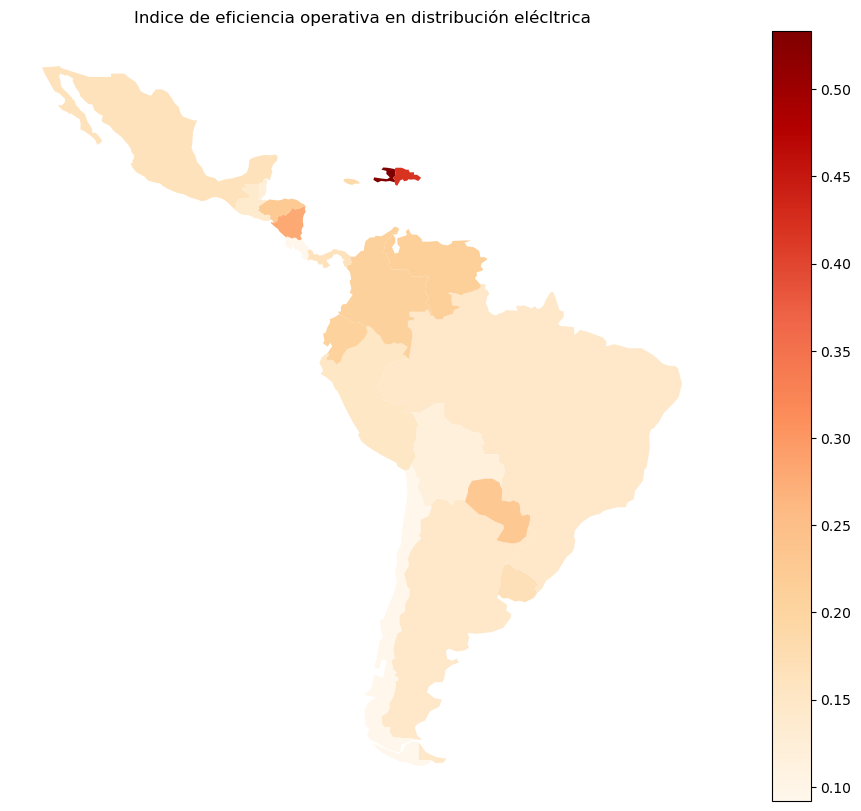

In [25]:
loss_map = world.join(df_map, on='iso_a3')
loss_map
loss_latam = loss_map.dropna(subset=['d_losses'])
loss_latam.plot(column='d_losses', cmap='OrRd', legend=True, figsize=(15, 10))

plt.title('Indice de eficiencia operativa en distribución elécltrica')
plt.axis('off')
plt.show()

En la gráfica anterior se observa que en promedio los valores de pérdidas son estables en la mayoria de paises en valores menores al 20%. 

Se destacan los valores de Nicaragua, Haití y República Dominicana. 

Se recomienda para futuras entregas considerar el uso de mapas interactivos. 

##  Conclusiones

Luego del análisis se comenta sobre las hipótesis y preguntas planteadas: 

### Hipótesis:
La información disponible será menor a medida que los registros sean más antiguos. 

<span style="color:blue">Se confirma</span>.

A medida que los registros correspondan a periodos más actuales, se tendrá mayor disponibilidad de información.
<span style="color:blue">Esto es cierto en general, pero existen indicios de que el data set cuenta con datos que aun no han sido actualizados en los periodos mas recientes</span>.

La distribución de pérdidas de energía es homogénea en todos los países de la región. 
<span style="color:blue">Los valores son dispersos teniendose en cuenta que Haití presenta valores muy elevados respecto al resto de paises, paises con mejor desempeño son Costa Rica y Chile</span>.


### Preguntas formuladas:

Los registros de pérdidas de energía muestran un incremento en la eficiencia de los sistemas a través del tiempo?
<span style="color:blue">Se observa que en promedio se tiene una mejora en la eficiencia</span>.

Con la información disponible es posible proyectar los crecimientos de demanda por país? 
<span style="color:blue">Se estima que es posible realizar un apredicción, no obstante esto queda para ser realizado en futuras entregas</span>.

Cual es la correlación que se tiene entre las distintas variables manejadas?
<span style="color:blue">Numero de reclamos ("complains") con las variables "n_con", "mwh_sold", y otras que están relacionadas directamente con el tamaño de la empresa distribuidora.</span>
<span style="color:blue">Cargos de transmisión ("transm_chrs_p") con cantidad de kmd e red ("lenght_net").</span>
<span style="color:blue">TOTEX (Gastos en red de distribución) y precio de instalación residencial ("inst_rd_price_p").</span>
